## 베이즈 추론 프로그램

In [4]:
import numpy as np

In [5]:
thetas = np.linspace(0, 1, 1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [6]:
likelihood = lambda r : thetas if r else (1 - thetas)

In [7]:
def posterior(r, prior):
    lp = likelihood(r) * prior 
    return lp / lp.sum()

In [8]:
# 사전분포 - 균일 분포 
p = np.array([1 / len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [9]:
# 클릭이 일어났을 때(r = 1)일 때 사후 확률
p = posterior(1, p)
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


In [10]:
import matplotlib.pyplot as plt 

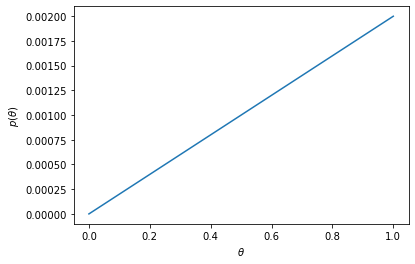

In [11]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [12]:
# A안 
clicks = 2 
noclicks = 38

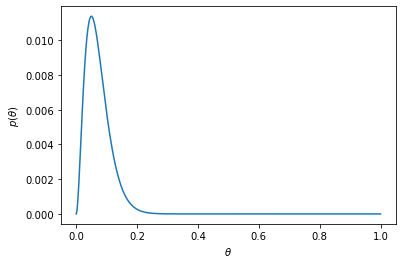

In [13]:
p = np.array([1 / len(thetas) for theta in thetas])

for _ in range(clicks):
    p = posterior(1, p)
for _ in range(noclicks):
    p = posterior(0, p)
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

### 1.5 다른 해결책 1: 반복을 모으기 

In [14]:
likelihood = lambda a, N: thetas ** a * (1 - thetas) ** (N - a)

In [15]:
def posterior(a, N, prior):
  lp = likelihood(a, N) * prior
  return lp / lp.sum()

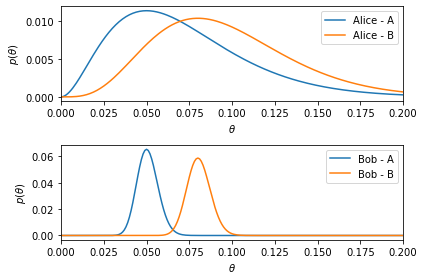

In [16]:
prior = 1 / len(thetas)
plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40, prior), label='Alice - A')
plt.plot(thetas, posterior(4, 50, prior), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280, prior), label='Bob - A')
plt.plot(thetas, posterior(128, 1600, prior), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.tight_layout()
plt.show()  # 그림 1-19 
